In [1]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit

<IPython.core.display.Javascript object>

# 8 Slice

In [ ]:
run hallprobesim.py

In [ ]:
ff1 = deepcopy(ff)

In [ ]:
labs=[i[2:] for i in ff1.params if ('A' in i and ff1.params[i].vary==True and i.split('_')[1] != '0')]

As_1=[ff1.params[i].value for i in ff1.params if ('A' in i and ff1.params[i].vary==True and i.split('_')[1] != '0')]

Bs_1=[ff1.params[i].value for i in ff1.params if ('B' in i and ff1.params[i].vary==True and i.split('_')[1] != '0')]

In [ ]:
_ = plt.plot(range(len(As_1)),As_1, 'o-', label='As, phi=0')
_ = plt.axhline(0,0, 1, linestyle='--', color='k')

_ = plt.xticks(range(len(As_1)), labs, rotation='vertical')
plt.yscale('symlog')
plt.legend()
plt.title('Free param values for A')

In [ ]:
_ = plt.plot(range(len(Bs_1)),Bs_1, 'o-', label='Bs, phi=0')
_ = plt.axhline(0,0, 1, linestyle='--', color='k')


_ = plt.xticks(range(len(Bs_1)), labs, rotation='vertical')
plt.yscale('symlog')
plt.legend()
plt.title('Free param values for B')

In [ ]:
ns = ff1.params['ns'].value
ks = ff1.params['ms'].value
k,n = np.meshgrid(range(ks+1),range(ns+1))
Ank = np.asarray([ff1.params[i] for i in ff1.params if 'A' in i]).reshape(ns,ks)
Bnk = np.asarray([ff1.params[i] for i in ff1.params if 'B' in i]).reshape(ns,ks)
AB_comb = Ank**2+Bnk**2

In [ ]:
import matplotlib.colors as colors
plt.pcolor(n,k, Ank,
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=Ank.min(), vmax=Ank.max()))
plt.colorbar()
plt.title('Ank for 8 Slices')
plt.xlabel('n')
plt.ylabel('k')
plt.figure()
plt.pcolor(n,k, Bnk,
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=Bnk.min(), vmax=Bnk.max()))
plt.colorbar()
plt.title('Bnk for 8 Slices')
plt.xlabel('n')
plt.ylabel('k')

In [ ]:
import matplotlib.colors as colors
plt.pcolor(n,k, abs(Ank),
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=0, vmax=Ank.max()))
plt.colorbar()
plt.title('abs(Ank)')
plt.xlabel('n')
plt.ylabel('k')
plt.figure()
plt.pcolor(n,k, abs(Bnk),
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=0, vmax=Bnk.max()))
plt.colorbar()
plt.title('abs(Bnk)')
plt.xlabel('n')
plt.ylabel('k')

In [ ]:
import matplotlib.colors as colors
plt.pcolor(n,k, AB_comb,
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=AB_comb.min(), vmax=AB_comb.max()))
plt.colorbar()
plt.title('Ank^2+Bnk^2')
plt.xlabel('n')
plt.ylabel('k')
ax = plt.gca()
ax.text(0.1, 0.75, f'chi2={ff1.result.chisqr}',
        horizontalalignment='left',
        verticalalignment='top',
        color='white',
        fontsize=18,
        transform=ax.transAxes)

In [ ]:
ff1.result.chisqr

In [ ]:
run hallprobesim.py

In [ ]:
df = ff.input_data

In [ ]:
df.head()

In [ ]:
ax = mu2e_plot(df, 'Z', 'Br', 'Y==0 and X==225 and 9000<Z<12500',
            info = 'Mau13')
mu2e_plot(df, 'Z', 'Br_fit', 'Y==0 and X==225 and 9000<Z<12500',
            info = 'Mau13', ax=ax)
plt.title('Z vs Br for Bottle Slice in Mau13 (Y=0, X=225)')
plt.xlabel('Z (mm)')
plt.ylabel('Br (T)')

In [ ]:
ax = mu2e_plot(df, 'Z', 'Bphi', 'Y==0 and X==225 and 9000<Z<12500',
            info = 'Mau13')
mu2e_plot(df, 'Z', 'Bphi_fit', 'Y==0 and X==225 and 9000<Z<12500',
            info = 'Mau13', ax=ax)
plt.title('Z vs Bphi for Bottle Slice in Mau13 (Y=0, X=225)')
plt.xlabel('Z (mm)')
plt.ylabel('Bphi (T)')

In [2]:
df_mau13 = DataFrameMaker(mu2e_ext_path+'datafiles/Mau13/Mu2e_DSMap_V13',input_type = 'pkl').data_frame

In [ ]:
_ = mu2e_plot3d(df, 'Z', 'Y', 'Bphi', 'X==0 and 5000<Z<12000',
            info = 'Mau13', mode='plotly_nb')



In [ ]:
for z in range(11821, 13230, 100):
    plt.figure()
    _ = mu2e_plot3d(df_mau13, 'X', 'Y', 'Br', f'R<=950 and Z=={z}',
            info = 'Mau13', mode='mpl', ptype='heat', save_dir='daniele_plots')
    plt.figure()
    _ = mu2e_plot3d(df_mau13, 'X', 'Y', 'Bphi', f'R<=950 and Z=={z}',
            info = 'Mau13', mode='mpl', ptype='heat', save_dir='daniele_plots')

phi=0    
plt.figure()
_ = mu2e_plot3d(df_mau13, 'Z', 'R', 'Br', f'R<=950 and 11820<Z<13230 and Phi=={phi}',
        info = 'Mau13', mode='mpl', ptype='heat', save_dir='daniele_plots')
plt.figure()
_ = mu2e_plot3d(df_mau13, 'Z', 'R', 'Bphi', f'R<=950 and 11820<Z<13230 and Phi=={phi}',
        info = 'Mau13', mode='mpl', ptype='heat', save_dir='daniele_plots')
phi=np.pi/2    
plt.figure()
_ = mu2e_plot3d(df_mau13, 'Z', 'R', 'Br', f'R<=950 and 11820<Z<13230 and Phi=={phi}',
        info = 'Mau13', mode='mpl', ptype='heat', save_dir='daniele_plots')
plt.figure()
_ = mu2e_plot3d(df_mau13, 'Z', 'R', 'Bphi', f'R<=950 and 11820<Z<13230 and Phi=={phi}',
        info = 'Mau13', mode='mpl', ptype='heat', save_dir='daniele_plots')

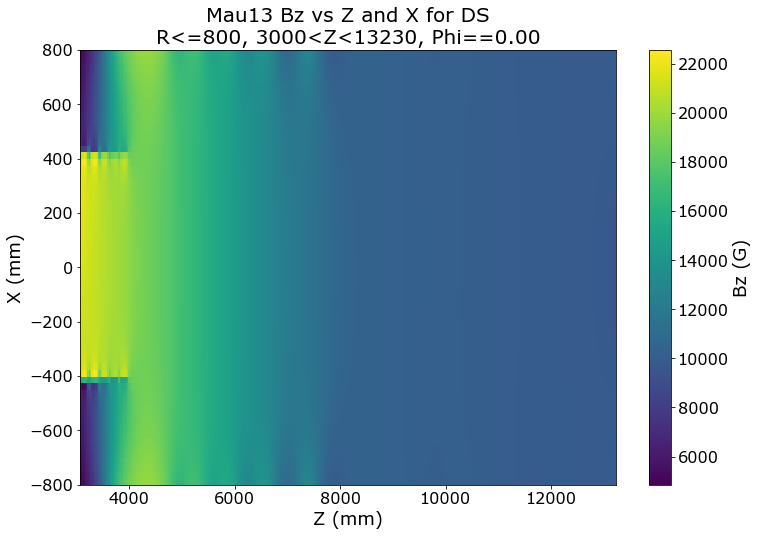

In [16]:
_ = mu2e_plot3d(df_mau13, 'Z', 'X', 'Bz', f'R<=800 and 3000<Z<13230 and Phi==0',
        info = 'Mau13', mode='mpl', ptype='heat')

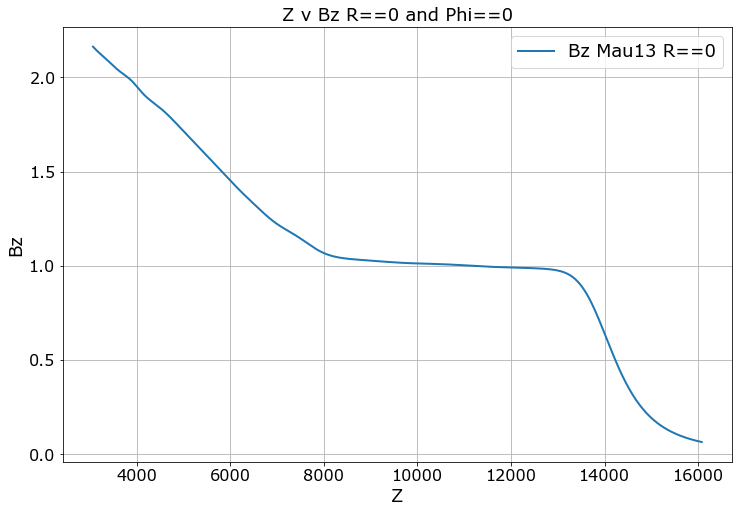

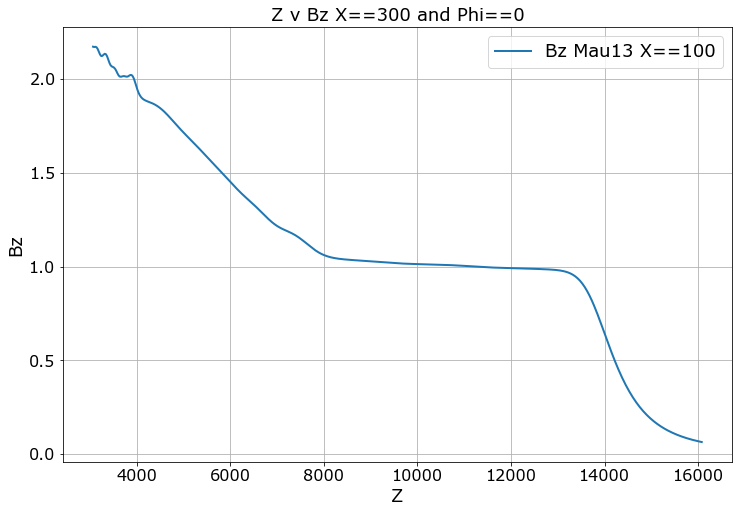

In [14]:
_ = mu2e_plot(df_mau13, 'Z', 'Bz', f'R==0 and Phi==0',
        info = 'Mau13 R==0', mode='mpl')
_ = mu2e_plot(df_mau13, 'Z', 'Bz', f'X==300 and Phi==0',
        info = 'Mau13 X==100', mode='mpl')